# Overview

In this project, I wish to build a Regression Model to predict the sold price of a house given some features of the house.
The approach I am going to take here will be to predict the Price per Square foot for a new observation. Then multiply this with the square feet for the new observation to obtain the predicted sold price for the house.

# Use Case:

This model could be used by management of a Real Estates Agency who would like to determine whether or not the price they could sell a new house (yet to be built) is worth the dollar to be spent in building the house with the given features.

# Useful Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)

import warnings
warnings.filterwarnings('ignore')

# Read In The Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw_house_data.csv')
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


It can be seen that the data consists of 5000 observed sold house each with 16 features (columns).
Note that, under normal circumstances, we would need to do extensive Eploratory data Analysis prior to proceeding with modeling. However, some exploratory analysis has been done for this particular dataset in my previous Colab notebooks, also found on GitHub account. Thus, I am omiting extensive exploratory analysis here.

## Copy the data prior to data manipulation

In [3]:
data = df.copy()
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [4]:
# Check the dimension of the dataset
data.shape

(5000, 16)

In [5]:
# Check the column names
list(data.columns)

['MLS',
 'sold_price',
 'zipcode',
 'longitude',
 'latitude',
 'lot_acres',
 'taxes',
 'year_built',
 'bedrooms',
 'bathrooms',
 'sqrt_ft',
 'garage',
 'kitchen_features',
 'fireplaces',
 'floor_covering',
 'HOA']

In [6]:
# Check the data types
data.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [7]:
# count the number of actual data per column
data.count()

,0
MLS,5000
sold_price,5000
zipcode,5000
longitude,5000
latitude,5000
lot_acres,4990
taxes,5000
year_built,5000
bedrooms,5000
bathrooms,4994


We note that some observations have missing values and the way we treat missing values in this project will be to drop them as most are less than 5% of the data.
There are ways to impute missing values but we omit those in this project.

# Split Data Into Train and Test sets

I now split the data into train and test sets for training the model and testing the model respectively.

In [8]:
# Perform 84%/16% split.
df_train = data[:4200]

In [70]:
df_test = data[4200:]
df_test

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4200,21706086,560000.0,85742,-111.076927,32.398152,3.33,7157.09,2006,4,5.0,3724.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",3,"Carpet, Natural Stone",0
4201,21802819,579000.0,85749,-110.760576,32.252516,0.46,2135.11,2017,4,4.0,2669.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",113
4202,21727968,575000.0,85715,-110.865306,32.260790,0.98,4153.00,1966,3,2.0,2478.0,2.0,"Dishwasher, Refrigerator",0,"Carpet, Ceramic Tile, Laminate",48
4203,21819481,580000.0,85749,-110.779332,32.247492,0.90,4752.00,1985,4,4.0,3700.0,3.0,"Compactor, Dishwasher, Double Sink, Electric R...",1,"Carpet, Ceramic Tile, Laminate",41.66
4204,21823719,567500.0,85750,-110.823481,32.279308,1.66,4416.90,1974,4,3.0,2864.0,2.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile, Wood",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [9]:
df_train

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,505000.0,85718,-110.949773,32.309916,0.80,4825.00,1983,4,3.0,2693.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Wood",5
4196,21221467,544366.0,85749,-110.715703,32.247349,3.33,4732.00,1993,3,4.0,3058.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile",25
4197,21303548,575000.0,85718,-110.886009,32.320210,0.78,4640.00,1979,5,5.0,4338.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2,"Carpet, Ceramic Tile",21
4198,21700052,573000.0,85718,-110.950395,32.310819,0.67,5367.46,1987,5,3.0,3208.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile, Natural Stone, Wood",5


In [10]:
df_test

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4200,21706086,560000.0,85742,-111.076927,32.398152,3.33,7157.09,2006,4,5.0,3724.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",3,"Carpet, Natural Stone",0
4201,21802819,579000.0,85749,-110.760576,32.252516,0.46,2135.11,2017,4,4.0,2669.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",113
4202,21727968,575000.0,85715,-110.865306,32.260790,0.98,4153.00,1966,3,2.0,2478.0,2.0,"Dishwasher, Refrigerator",0,"Carpet, Ceramic Tile, Laminate",48
4203,21819481,580000.0,85749,-110.779332,32.247492,0.90,4752.00,1985,4,4.0,3700.0,3.0,"Compactor, Dishwasher, Double Sink, Electric R...",1,"Carpet, Ceramic Tile, Laminate",41.66
4204,21823719,567500.0,85750,-110.823481,32.279308,1.66,4416.90,1974,4,3.0,2864.0,2.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile, Wood",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


The training dataset consists of 4200 observations and the test dataset consists of 800 observations.

In [11]:
# Change the number of fireplaces from object type to integer type
df_train['fireplaces'] = df_train['fireplaces'].apply(lambda x: int(x) if x != ' ' else np.nan)

From the exploratory data analysis done in the prior work on this dataset, we found out that there are outliers for some of the numerical variables. I write a function to replace outliers with the minimum and maximum values that are not outliers.

In [12]:
# Function to replace the outliers with minimum and maximum data that are not outliers
def replace_outliers(df, column):
  # Calculate Q1, Q3 and IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Get min and max within bounds
  non_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]
  valid_min = non_outliers.min()
  valid_max = non_outliers.max()

  # Replace Outliers
  df[column] = np.where(df[column] < lower_bound, valid_min, df[column])
  df[column] = np.where(df[column] > upper_bound, valid_max, df[column])

  return df

Collect the variables for which we want to replace the outliers.  

In [13]:
vars = [
 'sold_price',
 'lot_acres',
 'taxes',
 'bedrooms',
 'bathrooms',
 'sqrt_ft',
 'fireplaces',
 'garage']

Replace the outliers

In [14]:
for i in vars:
  df_train = replace_outliers(df_train, i)

df_train

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,1275000.0,85637,-110.378200,31.356362,3.75,5272.00,1941,5,5.0,5927.0,1.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,1275000.0,85646,-111.045371,31.594213,3.75,10422.36,1997,2,2.0,5927.0,1.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,1275000.0,85646,-111.040707,31.594844,3.75,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,1275000.0,85646,-111.035925,31.645878,3.75,8418.58,1930,5,5.0,5927.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,1275000.0,85750,-110.813768,32.285162,3.21,13688.15,1995,4,5.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,505000.0,85718,-110.949773,32.309916,0.80,4825.00,1983,4,3.0,2693.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Wood",5
4196,21221467,544366.0,85749,-110.715703,32.247349,3.33,4732.00,1993,3,4.0,3058.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",25
4197,21303548,575000.0,85718,-110.886009,32.320210,0.78,4640.00,1979,5,5.0,4338.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile",21
4198,21700052,573000.0,85718,-110.950395,32.310819,0.67,5367.46,1987,5,3.0,3208.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile, Natural Stone, Wood",5


# Checking for possible multicollinearity

I am going to look at the heatmap of the correlation matrix and see which of the dependent variables (i.e. predictor features) to see if there is multicollinearity that will make the parameters of the model unstable/unreliable for interpretability sake in particular. If I find any multicollinearity, I am going to either drop some features that are collinear of combine them into new features.

#### Heatmap of correlation matrix of numerical features:

In [15]:
# Numeric Data
vars.extend(['lot_acres', 'year_built'])
num_data = df_train[vars]
num_data

,sold_price,lot_acres,taxes,bedrooms,bathrooms,sqrt_ft,fireplaces,garage,lot_acres,year_built
0,1275000.0,3.75,5272.00,5,5.0,5927.0,6.0,1.0,3.75,1941
1,1275000.0,3.75,10422.36,2,2.0,5927.0,5.0,1.0,3.75,1997
2,1275000.0,3.75,10482.00,2,3.0,NaN,5.0,NaN,3.75,1997
3,1275000.0,3.75,8418.58,5,5.0,5927.0,4.0,4.0,3.75,1930
4,1275000.0,3.21,13688.15,4,5.0,5927.0,5.0,3.0,3.21,1995
...,...,...,...,...,...,...,...,...,...,...
4195,505000.0,0.80,4825.00,4,3.0,2693.0,2.0,3.0,0.80,1983
4196,544366.0,3.33,4732.00,3,4.0,3058.0,1.0,3.0,3.33,1993
4197,575000.0,0.78,4640.00,5,5.0,4338.0,2.0,2.0,0.78,1979
4198,573000.0,0.67,5367.46,5,3.0,3208.0,1.0,3.0,0.67,1987


<Axes: >

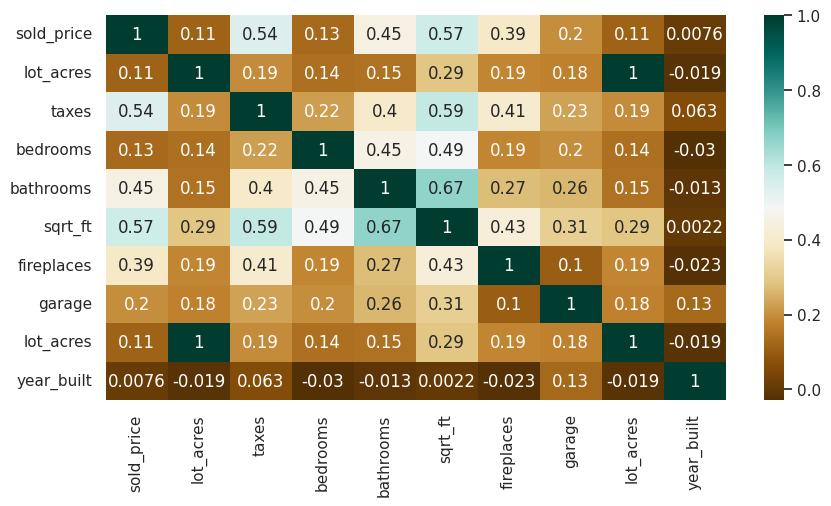

In [16]:
plt.figure(figsize=(10,5))
c = num_data.corr()
sns.heatmap(c, cmap="BrBG", annot =True)

# Creating features from the floor covering and kitchen features colums

Since money is used to buy the covering for the floor of the house and the house's kitchen features, we expect that this costs will have impart on the price the house will be sold for. For this reason, information about whether or not these features exist in the house will determine the sold price in some way. I therefore try to engineer additional features from these columns' values to be used in our model.

#### Let's look at how the floor covering column looks like:

In [17]:
floor_cov = list(data['floor_covering'])
floor_cov

['Mexican Tile, Wood',
 'Natural Stone, Other',
 'Natural Stone, Other: Rock',
 'Ceramic Tile, Laminate, Wood',
 'Carpet, Concrete',
 'Natural Stone, Wood, Other',
 'Carpet, Natural Stone, Wood, Other',
 'Carpet, Natural Stone, Wood',
 'Carpet, Natural Stone, Wood, Other',
 'Carpet, Concrete',
 'Concrete, Natural Stone, Wood',
 'Carpet, Natural Stone, Wood',
 'Mexican Tile, Natural Stone, Wood',
 'Natural Stone',
 'Natural Stone, Wood',
 'Natural Stone, Wood',
 'Carpet, Natural Stone',
 'Carpet, Natural Stone',
 'Natural Stone, Wood',
 'Carpet, Concrete, Natural Stone, Wood',
 'Natural Stone, Wood',
 'Carpet, Natural Stone, Wood, Other',
 'Carpet, Natural Stone, Wood',
 'Carpet, Concrete, Mexican Tile',
 'Carpet, Ceramic Tile, Natural Stone',
 'Carpet, Concrete, Natural Stone, Wood',
 'Natural Stone, Wood',
 'Concrete',
 'Carpet, Natural Stone',
 'Carpet, Mexican Tile, Other',
 'Natural Stone',
 'Carpet, Other: Porcelain',
 'Carpet, Natural Stone',
 'Carpet, Other',
 'Carpet, Other',
 

It can be seen that each value in the column is a string consisting of a 'list' of the different floor coverings the house has. I am going to try to get a ROUGH idea of the different types of floor coverings that could be in a house. To do this, I write the following function to:
1. Go through each cell (i.e. consider each string in the cell).
2. Format it so that for example 'Mexican Tile' in one cell and ' Mexican Tile' in another will be identified as the same thing eventhough the 2nd case has a space in front of Mexican but the 1st case does not.
3. Get the possible floor coverings.

In [18]:
def get_uniques(lst):
  # Define an empty list to store the results
  uniques = [] # define an empty list
  for value in lst:
    temp = str(value).split(',') # collect the different strings seperated by a comma for that cell into a list
    for val in temp:
      if str(val).strip() not in uniques: # remove white spaces at the ends and check if it is NOT already in the uniques list
        uniques.append(val.strip()) # append it if it is not in the uniques list
  print(len(uniques)) # Check the length of the uniques.
  print()
  return uniques

#### Use the function to get the unique floor coverings:

In [19]:
unique_floorings = get_uniques(floor_cov)
unique_floorings

125



['Mexican Tile',
 'Wood',
 'Natural Stone',
 'Other',
 'Other: Rock',
 'Ceramic Tile',
 'Laminate',
 'Carpet',
 'Concrete',
 'Other: Porcelain',
 'Vinyl',
 'Other: Brick',
 'Other: Brick Pavers',
 'Other: Flagstone',
 'Other: Marble-Master Bath',
 'Other: Marble',
 'Granite',
 'Other: concrete tile',
 'Other: Porcelain Tile',
 'Other: Quartzite',
 'Other: Porcelyn',
 'Other: Tile',
 'Other: Porcelain tile',
 'Other: CONCRETE TILE',
 'Other: Brick Floor',
 'Other: Saltillo',
 'Other: Travertine Tile',
 'Indoor/Outdoor',
 'Other: Travertine',
 'Other: Lime Stone',
 'Other: Limestone',
 'Other: Multiple Types',
 'Other: Refinished Brick',
 'Other: studio laminate',
 'Other: Porcelain/Engineered',
 'Other: Brick inlayed',
 'Other: Terrazzo',
 'Other: Cement tiles/Bamboo',
 'Other: Slate',
 'Other: gray saltillo',
 'Other: Organic Wool Carpet',
 'Other: brick',
 'Other: flagstone',
 'Other: Egytian sandstone',
 'Other: Travertine & slate',
 'Other: Cork',
 'Other: TBD',
 'Other: porcelain t

We can observe that there are 125 unique floor coverings, but we do not want to engineer too many features so we are going to pick only the useful ones to engineer the features. To do this, all the floor coverings that has 'Other' in it will just be grouped as one. I therefore remove all of them and use just one 'Other' category.
I use list comprehension to achieve this below:

In [20]:
# List comprehension and set.
unique_floorings = set(['Other' if 'Other' in x else x for x in unique_floorings])
print(len(unique_floorings))
unique_floorings

12


{'Carpet',
 'Ceramic Tile',
 'Concrete',
 'Granite',
 'Indoor/Outdoor',
 'Laminate',
 'Mexican Tile',
 'Natural Stone',
 'Other',
 'Vinyl',
 'Wood',
 'nan'}

It can be seen that there are 11 groups of floor coverings (i.e. if we omit the 'nan' (which is just NaN)).
I'm going to use this list in my feature engineering later on in the modeling to engineer new columns that will have the value 1 if the house has that covering and 0 if it does not.

#### Let's do the same for kitchen features column

Check how the kitchen features column looks like:

In [21]:
kitchen_features = list(data['kitchen_features'])
kitchen_features

['Dishwasher, Freezer, Refrigerator, Oven',
 'Dishwasher, Garbage Disposal',
 'Dishwasher, Garbage Disposal, Refrigerator',
 'Dishwasher, Double Sink, Pantry: Butler, Refrigerator',
 'Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven',
 'Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven',
 'Dishwasher, Garbage Disposal, Oven',
 'Compactor, Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven',
 'Compactor, Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven',
 'Dishwasher, Double Sink, Electric Range, Freezer, Garbage Disposal, Island, Pantry: Butler, Refrigerator, Appliance Color: Stainless, Countertops: CORIAN, Microwave: Built In, Oven: Built In',
 'Freezer, Refrigerator, Appliance Color: Stainless, Countertops: wood and granite, Oven: 2 ovens-Main 1-GH',
 'Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven',
 'Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven',
 'Compactor, Dishwasher, Garbage Disposal, Refrige

The kitchen features column has the same format as the floor covering column. I use the same function to format and get the uniques:

In [22]:
unique_kitchen_features = get_uniques(kitchen_features)
unique_kitchen_features

700



['Dishwasher',
 'Freezer',
 'Refrigerator',
 'Oven',
 'Garbage Disposal',
 'Double Sink',
 'Pantry: Butler',
 'Microwave',
 'Compactor',
 'Electric Range',
 'Island',
 'Appliance Color: Stainless',
 'Countertops: CORIAN',
 'Microwave: Built In',
 'Oven: Built In',
 'Countertops: wood and granite',
 'Oven: 2 ovens-Main 1-GH',
 'Gas Range',
 'Prep Sink',
 'Appliance Color: Black',
 'Countertops: Granite',
 'Desk',
 'Warming Drawer',
 'Countertops: Marble',
 'Lazy Susan',
 'Pantry: Walk-In',
 'Countertops: granite',
 'Countertops: Concrete',
 'Microwave: Drawer',
 'Oven: Double Wall',
 'Microwave: Stainless',
 'Oven: Stainless',
 'Countertops: Granite & Quartz',
 'Indoor Grill',
 'Wet Bar',
 'Microwave: stainless',
 'Oven: stainless',
 'Water Purifier',
 'Microwave: wolf',
 'Oven: wolf',
 'Countertops: quartz',
 'Microwave: built in',
 'Countertops: Marble & Granite',
 'Microwave: yes',
 'Oven: yes',
 'Pantry: Closet',
 'Appliance Color: Other',
 'Countertops: Ceaserstone',
 'Microwave: B

In [23]:
unique_kitchen_features = set(['Other' if 'Other' in x else x for x in unique_kitchen_features])
print(len(unique_kitchen_features))
unique_kitchen_features

697


{'# of Ovens: 1',
 '# of Ovens: 2',
 'Appliance Color: Almond',
 'Appliance Color: Black',
 'Appliance Color: Stainless',
 'Appliance Color: White',
 'Black',
 'Built In',
 'Built in',
 'Butch Block',
 'Compactor',
 'Convection Oven',
 'Countertops: .',
 'Countertops: Brazilian Granite',
 'Countertops: Brazillian slate',
 'Countertops: ButcherBlock/Concret',
 'Countertops: CONCRETE',
 'Countertops: CORIAN',
 'Countertops: CUSTOM TILE &GRANITE',
 'Countertops: Caesar Stone',
 'Countertops: Caesarstone',
 'Countertops: Ceasarstone',
 'Countertops: Ceaserstone',
 'Countertops: Cement-laminate',
 'Countertops: Ceramic',
 'Countertops: Ceramic Tile',
 'Countertops: Chiseled Granite',
 'Countertops: Chisled Edge Granite',
 'Countertops: Colored concrete',
 'Countertops: Combo',
 'Countertops: Composite Granite',
 'Countertops: Concrete',
 'Countertops: Concrete/Wood',
 'Countertops: Conrete/Stone',
 'Countertops: Corain',
 'Countertops: Corian',
 'Countertops: Corian - wood',
 'Countertops: 

In [24]:
unique_kitchen_features = set(['Microwave' if 'Microwave' in x else x for x in unique_kitchen_features])
print(len(unique_kitchen_features))
unique_kitchen_features

490


{'# of Ovens: 1',
 '# of Ovens: 2',
 'Appliance Color: Almond',
 'Appliance Color: Black',
 'Appliance Color: Stainless',
 'Appliance Color: White',
 'Black',
 'Built In',
 'Built in',
 'Butch Block',
 'Compactor',
 'Convection Oven',
 'Countertops: .',
 'Countertops: Brazilian Granite',
 'Countertops: Brazillian slate',
 'Countertops: ButcherBlock/Concret',
 'Countertops: CONCRETE',
 'Countertops: CORIAN',
 'Countertops: CUSTOM TILE &GRANITE',
 'Countertops: Caesar Stone',
 'Countertops: Caesarstone',
 'Countertops: Ceasarstone',
 'Countertops: Ceaserstone',
 'Countertops: Cement-laminate',
 'Countertops: Ceramic',
 'Countertops: Ceramic Tile',
 'Countertops: Chiseled Granite',
 'Countertops: Chisled Edge Granite',
 'Countertops: Colored concrete',
 'Countertops: Combo',
 'Countertops: Composite Granite',
 'Countertops: Concrete',
 'Countertops: Concrete/Wood',
 'Countertops: Conrete/Stone',
 'Countertops: Corain',
 'Countertops: Corian',
 'Countertops: Corian - wood',
 'Countertops: 

In [25]:
unique_kitchen_features = set(['Missing' if 'Missing' in x else x for x in unique_kitchen_features])
print(len(unique_kitchen_features))
unique_kitchen_features

472


{'# of Ovens: 1',
 '# of Ovens: 2',
 'Appliance Color: Almond',
 'Appliance Color: Black',
 'Appliance Color: Stainless',
 'Appliance Color: White',
 'Black',
 'Built In',
 'Built in',
 'Butch Block',
 'Compactor',
 'Convection Oven',
 'Countertops: .',
 'Countertops: Brazilian Granite',
 'Countertops: Brazillian slate',
 'Countertops: ButcherBlock/Concret',
 'Countertops: CONCRETE',
 'Countertops: CORIAN',
 'Countertops: CUSTOM TILE &GRANITE',
 'Countertops: Caesar Stone',
 'Countertops: Caesarstone',
 'Countertops: Ceasarstone',
 'Countertops: Ceaserstone',
 'Countertops: Cement-laminate',
 'Countertops: Ceramic',
 'Countertops: Ceramic Tile',
 'Countertops: Chiseled Granite',
 'Countertops: Chisled Edge Granite',
 'Countertops: Colored concrete',
 'Countertops: Combo',
 'Countertops: Composite Granite',
 'Countertops: Concrete',
 'Countertops: Concrete/Wood',
 'Countertops: Conrete/Stone',
 'Countertops: Corain',
 'Countertops: Corian',
 'Countertops: Corian - wood',
 'Countertops: 

This reduces to 41 different types. I'm going to copy and paste this to the next cell and delete the unreasonable values and use the rest as my unique kitchen features.

In [26]:
['Compactor',
 'Countertops',
 'Desk',
 'Dishwasher',
 'Double Sink',
 'Electric Range',
 'Freezer',
 'Garbage Disposal',
 'Gas Cooktop',
 'Gas Range',
 'Indoor Grill',
 'Microwave',
 'Other',
 'Oven',
 'Pantry',
 'Prep Sink',
 'Refrigerator',
 'Reverse Osmosis',
 'Warming Drawer',
 'Water Purifier',
 'Wet Bar',
 'Wine Cooler',
 'convection']

['Compactor',
 'Countertops',
 'Desk',
 'Dishwasher',
 'Double Sink',
 'Electric Range',
 'Freezer',
 'Garbage Disposal',
 'Gas Cooktop',
 'Gas Range',
 'Indoor Grill',
 'Microwave',
 'Other',
 'Oven',
 'Pantry',
 'Prep Sink',
 'Refrigerator',
 'Reverse Osmosis',
 'Warming Drawer',
 'Water Purifier',
 'Wet Bar',
 'Wine Cooler',
 'convection']

I pick a subset of these kitchen features to create indicator columns later one in this project. The value will be 1 if the house has that feature and 0 if it does not.

# Define Preprocess functions

I define functions to preprocess the dataset next.

In [27]:
def preprocess(X):
  """
  X : A dataframe.
  This function takes in a DataFrame, calculates the price per square foot (ppsf), eliminates ppsf that is either
  below 50 or above 800, creates a column that is the bin in which the price per square fit lies (i.e. num_bin).
  """

  # Drop NAs.
  X = X.dropna()

  ############################################################################
  # Define sold price per square feet
  X['sold_price_per_sqrft'] = X['sold_price']/X['sqrt_ft'] #.replace(0, pd.NA)
  # X['sold_price_per_sqrft'] = X['sold_price_per_sqrft'].fillna(0)


  # Drop
  #X = X.drop(['sold_price','sqrt_ft'], axis = 1)

  # Remove the values less than $50 and greater than $800 per square feet
  X = X[(X['sold_price_per_sqrft'] >= 50)&(X['sold_price_per_sqrft'] <= 800)]

  # Define bin edges
  bin_edges = list(range(50, 851, 50))

  X['binned_sold_price_per_sqrft'] = pd.cut(X['sold_price_per_sqrft'], bins= bin_edges)

  diction = {'(50, 100]': 1, '(100, 150]': 2, '(150, 200]': 3, '(200, 250]': 4,
             '(250, 300]': 5, '(300, 350]': 6, '(350, 400]': 7, '(400, 450]': 8,
             '(450, 500]': 9, '(500, 550]': 10, '(550, 600]': 11, '(600, 650]': 12,
             '(650, 700]': 13, '(700, 750]': 14, '(750, 800]': 15, '(800, 850]': 16
            }
  # diction
  X['binned_sold_price_per_sqrft'] = X['binned_sold_price_per_sqrft'].astype(str)

  X['num_bin'] = X['binned_sold_price_per_sqrft'].map(diction)

  X = X.drop('binned_sold_price_per_sqrft', axis = 1)

  return X

In [28]:
df_train = preprocess(df_train)
df_train

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,sold_price_per_sqrft,num_bin
0,21530491,1275000.0,85637,-110.378200,31.356362,3.75,5272.00,1941,5,5.0,5927.0,1.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0,215.117260,4
1,21529082,1275000.0,85646,-111.045371,31.594213,3.75,10422.36,1997,2,2.0,5927.0,1.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0,215.117260,4
4,21306357,1275000.0,85750,-110.813768,32.285162,3.21,13688.15,1995,4,5.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55,215.117260,4
5,21528016,1275000.0,85718,-110.910593,32.339090,1.67,13688.15,1999,3,4.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422,215.117260,4
6,21610478,1275000.0,85712,-110.883315,32.261069,2.10,13688.15,2001,5,5.0,5927.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0,215.117260,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,505000.0,85718,-110.949773,32.309916,0.80,4825.00,1983,4,3.0,2693.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Wood",5,187.523208,3
4196,21221467,544366.0,85749,-110.715703,32.247349,3.33,4732.00,1993,3,4.0,3058.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",25,178.013734,3
4197,21303548,575000.0,85718,-110.886009,32.320210,0.78,4640.00,1979,5,5.0,4338.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile",21,132.549562,2
4198,21700052,573000.0,85718,-110.950395,32.310819,0.67,5367.46,1987,5,3.0,3208.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile, Natural Stone, Wood",5,178.615960,3


In [ ]:
# df_test

In [29]:
y_true = df_train['sold_price']
sqrft = df_train['sqrt_ft']

In [30]:
X_knn = df_train[['longitude', 'latitude']].to_numpy()
y_knn = df_train['num_bin'].to_numpy()
df_train = df_train.drop(['longitude', 'latitude'], axis = 1)

# KNN Classifier Class

In [31]:
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [32]:
knn_instance = KNNClassifier()

In [33]:
knn_instance.fit(X_knn, y_knn)

In [34]:
pred_binNum = knn_instance.predict(X_knn, 100)
df_train['pred_bin_num'] = pred_binNum
df_train

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,sold_price_per_sqrft,num_bin,pred_bin_num
0,21530491,1275000.0,85637,3.75,5272.00,1941,5,5.0,5927.0,1.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0,215.117260,4,3.0
1,21529082,1275000.0,85646,3.75,10422.36,1997,2,2.0,5927.0,1.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0,215.117260,4,3.0
4,21306357,1275000.0,85750,3.21,13688.15,1995,4,5.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55,215.117260,4,3.0
5,21528016,1275000.0,85718,1.67,13688.15,1999,3,4.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422,215.117260,4,4.0
6,21610478,1275000.0,85712,2.10,13688.15,2001,5,5.0,5927.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0,215.117260,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,505000.0,85718,0.80,4825.00,1983,4,3.0,2693.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Wood",5,187.523208,3,3.0
4196,21221467,544366.0,85749,3.33,4732.00,1993,3,4.0,3058.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",25,178.013734,3,3.0
4197,21303548,575000.0,85718,0.78,4640.00,1979,5,5.0,4338.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile",21,132.549562,2,4.0
4198,21700052,573000.0,85718,0.67,5367.46,1987,5,3.0,3208.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile, Natural Stone, Wood",5,178.615960,3,3.0


In [35]:
df_train = df_train.drop('num_bin', axis = 1)

In [36]:
df_train

,MLS,sold_price,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,sold_price_per_sqrft,pred_bin_num
0,21530491,1275000.0,85637,3.75,5272.00,1941,5,5.0,5927.0,1.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0,215.117260,3.0
1,21529082,1275000.0,85646,3.75,10422.36,1997,2,2.0,5927.0,1.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0,215.117260,3.0
4,21306357,1275000.0,85750,3.21,13688.15,1995,4,5.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55,215.117260,3.0
5,21528016,1275000.0,85718,1.67,13688.15,1999,3,4.0,5927.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422,215.117260,4.0
6,21610478,1275000.0,85712,2.10,13688.15,2001,5,5.0,5927.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0,215.117260,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,505000.0,85718,0.80,4825.00,1983,4,3.0,2693.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Wood",5,187.523208,3.0
4196,21221467,544366.0,85749,3.33,4732.00,1993,3,4.0,3058.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",25,178.013734,3.0
4197,21303548,575000.0,85718,0.78,4640.00,1979,5,5.0,4338.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile",21,132.549562,4.0
4198,21700052,573000.0,85718,0.67,5367.46,1987,5,3.0,3208.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile, Natural Stone, Wood",5,178.615960,3.0


In [37]:
df_train = df_train.drop(['sold_price', 'sqrt_ft'], axis = 1)
df_train

,MLS,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,garage,kitchen_features,fireplaces,floor_covering,HOA,sold_price_per_sqrft,pred_bin_num
0,21530491,85637,3.75,5272.00,1941,5,5.0,1.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0,215.117260,3.0
1,21529082,85646,3.75,10422.36,1997,2,2.0,1.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0,215.117260,3.0
4,21306357,85750,3.21,13688.15,1995,4,5.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55,215.117260,3.0
5,21528016,85718,1.67,13688.15,1999,3,4.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422,215.117260,4.0
6,21610478,85712,2.10,13688.15,2001,5,5.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0,215.117260,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,85718,0.80,4825.00,1983,4,3.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Wood",5,187.523208,3.0
4196,21221467,85749,3.33,4732.00,1993,3,4.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",25,178.013734,3.0
4197,21303548,85718,0.78,4640.00,1979,5,5.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile",21,132.549562,4.0
4198,21700052,85718,0.67,5367.46,1987,5,3.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile, Natural Stone, Wood",5,178.615960,3.0


In [38]:
X_train = df_train[[col for col in df_train.columns if col != 'sold_price_per_sqrft']]
y_train = df_train['sold_price_per_sqrft']
X_train

,MLS,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,garage,kitchen_features,fireplaces,floor_covering,HOA,pred_bin_num
0,21530491,85637,3.75,5272.00,1941,5,5.0,1.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0,3.0
1,21529082,85646,3.75,10422.36,1997,2,2.0,1.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0,3.0
4,21306357,85750,3.21,13688.15,1995,4,5.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55,3.0
5,21528016,85718,1.67,13688.15,1999,3,4.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422,4.0
6,21610478,85712,2.10,13688.15,2001,5,5.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,21215256,85718,0.80,4825.00,1983,4,3.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Wood",5,3.0
4196,21221467,85749,3.33,4732.00,1993,3,4.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile",25,3.0
4197,21303548,85718,0.78,4640.00,1979,5,5.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Carpet, Ceramic Tile",21,4.0
4198,21700052,85718,0.67,5367.46,1987,5,3.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,"Carpet, Ceramic Tile, Natural Stone, Wood",5,3.0


In [39]:
y_train

,sold_price_per_sqrft
0,215.117260
1,215.117260
4,215.117260
5,215.117260
6,215.117260
...,...
4195,187.523208
4196,178.013734
4197,132.549562
4198,178.615960


In [40]:
print(min(y_train))
print(max(y_train))

85.20330690062426
547.4452554744526


In [45]:
# [1. 'MLS', 'sold_price', 2. 'zipcode', 7. 'longitude', 8. 'latitude', 'lot_acres', 3. 'taxes', 'year_built',
# 4. 'bedrooms', 5. 'bathrooms', 6. 'sqrt_ft', 'garage', 10. 'kitchen_features', 'fireplaces', 9. 'floor_covering', 'HOA']

  # def fit(self, X, y, K, epsilon=1e-3):
  #   pass

def preprocess_1(X):
  """
  X: A DataFrame.
  This function takes in a DataFrame of columns which are features and engineers new features needed for training our model.
  """
  #print(len(X))
  # Drop NaNs
  X = X.dropna()
  #print(len(X))
    # Drop colums we don't need
  if 'zipcode' in X.columns:
    X = X.drop('zipcode', axis =1)
  if 'taxes' in X.columns:
    X = X.drop('taxes', axis =1)
  if 'MLS' in X.columns:
    X = X.drop('MLS', axis =1)
   # bathrooms and bedrooms have high correlation so we combine them to
  # avoid multicollinearity.
  X['baths_per_bed'] = X['bathrooms']/X['bedrooms']
  # Drop them after they've served their purposes.
  X = X.drop(['bathrooms', 'bedrooms'], axis = 1)


  X['lot_acres'] = X['lot_acres'].apply(lambda x: float(str(x).replace(',','')))
  X['year_built'] = X['year_built'].apply(lambda x: float(str(x).replace(',','')))
  X['garage'] = X['garage'].apply(lambda x: float(str(x).replace(',','')))
  X['fireplaces'] = X['fireplaces'].apply(lambda x: float(str(x).replace(',','')))
  X['HOA'] = X['HOA'].apply(lambda x: float(str(x).replace(',','')))


  if 'floor_covering' in list(X.columns):
    X['floor_covering'] = X['floor_covering'].apply(lambda x: str(x))
    # Group all the floor coverings that has 'Other' in its name into one group called 'Other'
    # Note the list below (i.e. unique_floorings) was created by looking at some (not all) of the
    # possible values of the floor_covering column.
    unique_floorings = ['Mexican Tile', 'Wood', 'Natural Stone', 'Other', 'Carpet', 'Concrete',
                        'Ceramic Tile', 'Vinyl', 'Granite', 'Laminate', 'Indoor/Outdoor']
    # Create Indicator Variables (features) using unique_floorings.
    for i in unique_floorings:
      X['has_' + str(i).replace(' ', '_')] = data['floor_covering'].apply(lambda x: 1 if i in str(x) else 0)
    X = X.drop('floor_covering', axis = 1)

  if 'kitchen_features' in list(X.columns):
    X['kitchen_features'] = X['kitchen_features'].apply(lambda x: str(x))
    # Note the list below (i.e. unique_kitchen_feat) was created by looking at some (not all)
    # of the possible values of the kitchen_features column.
    unique_kitchen_feat= ['Dishwasher', 'Double Sink', 'Freezer','Garbage Disposal', 'Gas Range',
                          'Island', 'Pantry: Walk-In', 'Prep Sink', 'Refrigerator', 'Warming Drawer', # Modify Pantry: Walk-In
                          'Water Purifier', 'Wet Bar', 'Countertops: Granite', 'Microwave','Oven']    #   Modify Countertops: Granite
    for i in unique_kitchen_feat:
      X['has_' + str(i).replace(' ', '_')] = data['kitchen_features'].apply(lambda x: 1 if i in str(x) else 0)
    X = X.drop('kitchen_features', axis = 1)
    n = len(X)
    #X['b_param'] = np.ones(n)

  return X

# Regression Ensemble Class

In [50]:
class RegressionWithKNN():

  ###############################################################################
  # Fast Linear Regression
  def fit(self, X, y):
    #print(X)
    #print()
    #print(y)
    #print()
    if 'sqrt_ft' in list(X.columns):
      sqft_1 = X['sqrt_ft'].to_numpy()
      X = X.drop('sqrt_ft', axis = 1)
    X = preprocess_1(X)
    #print(X)
    X = X.to_numpy()
    self.W = np.linalg.solve(X.T@X, X.T@y)
    #print()
    #print(self.W)

  def predict(self, X):
    """
    X: A DataFrame.
    This function predicts the price per square foot of the house given the features.
    """
    if 'sqrt_ft' in list(X.columns):
      sqft_2 = X['sqrt_ft'].to_numpy()
      X = X.drop('sqrt_ft', axis = 1)
    X = preprocess_1(X)
    print('Final number of features: ', len(X.columns))
    print()
    print('The features used in the Final model are listed: ', '\n\n', X.columns)
    X = X.to_numpy()


    return (X@self.W)  # NNG: Matrix multiply X and the Weights.


In [51]:
reg_instance = RegressionWithKNN()

In [52]:
reg_instance.fit(X_train, y_train)

In [53]:
y_hat_train = reg_instance.predict(X_train)
print(min(y_hat_train))
print(max(y_hat_train))
print()
y_hat_train

Final number of features:  33

The features used in the Final model are listed:  

 Index(['lot_acres', 'year_built', 'garage', 'fireplaces', 'HOA',
       'pred_bin_num', 'baths_per_bed', 'has_Mexican_Tile', 'has_Wood',
       'has_Natural_Stone', 'has_Other', 'has_Carpet', 'has_Concrete',
       'has_Ceramic_Tile', 'has_Vinyl', 'has_Granite', 'has_Laminate',
       'has_Indoor/Outdoor', 'has_Dishwasher', 'has_Double_Sink',
       'has_Freezer', 'has_Garbage_Disposal', 'has_Gas_Range', 'has_Island',
       'has_Pantry:_Walk-In', 'has_Prep_Sink', 'has_Refrigerator',
       'has_Warming_Drawer', 'has_Water_Purifier', 'has_Wet_Bar',
       'has_Countertops:_Granite', 'has_Microwave', 'has_Oven'],
      dtype='object')
69.4908361841886
475.0826590949367



array([204.96723475, 219.00223121, 201.2029894 , ..., 220.19048927,
       167.11843053, 194.0317364 ])

## Predct the sold price


In [54]:
y_pred = sqrft * y_hat_train

In [55]:
y_pred

,sqrt_ft
0,1.214841e+06
1,1.298026e+06
4,1.192530e+06
5,1.449433e+06
6,1.038479e+06
...,...
4195,5.044108e+05
4196,5.962829e+05
4197,9.551863e+05
4198,5.361159e+05


## Mean Absolute Percentage Error

In [56]:
def MAPE(y_true, y_pred):

  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  print(f"MAPE: {mape:.2f}%")


In [57]:
MAPE(y_true, y_pred)

MAPE: 15.43%


## Testing on Test Data

In [71]:
# Column Order: The columns should be inputed in the following order:
# ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built',
#  'bedrooms', 'bathrooms', 'sqrt_ft','garage', 'kitchen_features', 'fireplaces', 'floor_covering',
# 'HOA']
df_test = df_test.dropna()
df_test

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
4200,21706086,560000.0,85742,-111.076927,32.398152,3.33,7157.09,2006,4,5.0,3724.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",3,"Carpet, Natural Stone",0
4201,21802819,579000.0,85749,-110.760576,32.252516,0.46,2135.11,2017,4,4.0,2669.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",113
4202,21727968,575000.0,85715,-110.865306,32.260790,0.98,4153.00,1966,3,2.0,2478.0,2.0,"Dishwasher, Refrigerator",0,"Carpet, Ceramic Tile, Laminate",48
4203,21819481,580000.0,85749,-110.779332,32.247492,0.90,4752.00,1985,4,4.0,3700.0,3.0,"Compactor, Dishwasher, Double Sink, Electric R...",1,"Carpet, Ceramic Tile, Laminate",41.66
4205,21833006,572500.0,85718,-110.955773,32.302174,0.93,5824.71,1974,5,3.0,3695.0,2.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",2,"Carpet, Natural Stone",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,85739,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",180
4989,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,Ceramic Tile,12
4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Mexican Tile",6
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,Ceramic Tile,198


#### Perform the Same processing on Test data as on Train Data

I define a function to perform the same preprocessing on the test data

In [72]:
def preprocess_test(X):

  X = X.dropna()
  X['fireplaces'] = X['fireplaces'].apply(lambda x: int(x) if x != ' ' else np.nan)
  vars = ['sold_price', 'lot_acres', 'taxes', 'bedrooms', 'sqrt_ft', 'fireplaces', 'garage']

  for i in vars:

    X = replace_outliers(X, i)

  y_true_test = X['sold_price']
  sqrft_test = X['sqrt_ft']

  X = X.drop(['sold_price', 'sqrt_ft'], axis = 1)

  X_knn_test = X[['longitude', 'latitude']].to_numpy()
  # y_knn = X['num_bin'].to_numpy()
  X = X.drop(['longitude', 'latitude'], axis = 1)

  pred_binNum_test = knn_instance.predict(X_knn_test, 100)
  X['pred_bin_num'] = pred_binNum_test

  X_test = X.copy()

  return X_test, sqrft_test, y_true_test


In [73]:
X_test, sqrft_test, y_true_test = preprocess_test(df_test)

In [74]:
X_test

,MLS,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,garage,kitchen_features,fireplaces,floor_covering,HOA,pred_bin_num
4200,21706086,85742,2.34,7157.09,2006,4,5.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",3,"Carpet, Natural Stone",0,3.0
4201,21802819,85749,0.46,2135.11,2017,4,4.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",0,"Carpet, Ceramic Tile",113,3.0
4202,21727968,85715,0.98,4153.00,1966,3,2.0,2.0,"Dishwasher, Refrigerator",0,"Carpet, Ceramic Tile, Laminate",48,3.0
4203,21819481,85749,0.90,4752.00,1985,4,4.0,3.0,"Compactor, Dishwasher, Double Sink, Electric R...",1,"Carpet, Ceramic Tile, Laminate",41.66,3.0
4205,21833006,85718,0.93,5824.71,1974,5,3.0,2.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",2,"Carpet, Natural Stone",7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,85739,0.29,4184.40,2006,2,3.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",180,4.0
4989,21902512,85745,1.19,6326.96,2007,4,3.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,Ceramic Tile,12,3.0
4993,21908358,85750,0.83,4568.71,1986,4,3.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Mexican Tile",6,4.0
4994,21909379,85718,0.18,4414.00,2002,3,2.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,Ceramic Tile,198,4.0


In [75]:
try_1 = X_test[3:4]
print(try_1)
t = reg_instance.predict(try_1)
t

           MLS  zipcode  lot_acres   taxes  year_built  bedrooms  bathrooms  \
4203  21819481    85749        0.9  4752.0        1985         4        4.0   

      garage                                   kitchen_features  fireplaces  \
4203     3.0  Compactor, Dishwasher, Double Sink, Electric R...           1   

                      floor_covering    HOA  pred_bin_num  
4203  Carpet, Ceramic Tile, Laminate  41.66           3.0  
Final number of features:  33

The features used in the Final model are listed:  

 Index(['lot_acres', 'year_built', 'garage', 'fireplaces', 'HOA',
       'pred_bin_num', 'baths_per_bed', 'has_Mexican_Tile', 'has_Wood',
       'has_Natural_Stone', 'has_Other', 'has_Carpet', 'has_Concrete',
       'has_Ceramic_Tile', 'has_Vinyl', 'has_Granite', 'has_Laminate',
       'has_Indoor/Outdoor', 'has_Dishwasher', 'has_Double_Sink',
       'has_Freezer', 'has_Garbage_Disposal', 'has_Gas_Range', 'has_Island',
       'has_Pantry:_Walk-In', 'has_Prep_Sink', 'has_Refr

array([165.17013782])

In [ ]:
# MAE(act, y_try)

#### Predict Price Per Square Foot

In [76]:
y_hat_test = reg_instance.predict(X_test)
print(min(y_hat_test))
print(max(y_hat_test))
print()
y_hat_test

Final number of features:  33

The features used in the Final model are listed:  

 Index(['lot_acres', 'year_built', 'garage', 'fireplaces', 'HOA',
       'pred_bin_num', 'baths_per_bed', 'has_Mexican_Tile', 'has_Wood',
       'has_Natural_Stone', 'has_Other', 'has_Carpet', 'has_Concrete',
       'has_Ceramic_Tile', 'has_Vinyl', 'has_Granite', 'has_Laminate',
       'has_Indoor/Outdoor', 'has_Dishwasher', 'has_Double_Sink',
       'has_Freezer', 'has_Garbage_Disposal', 'has_Gas_Range', 'has_Island',
       'has_Pantry:_Walk-In', 'has_Prep_Sink', 'has_Refrigerator',
       'has_Warming_Drawer', 'has_Water_Purifier', 'has_Wet_Bar',
       'has_Countertops:_Granite', 'has_Microwave', 'has_Oven'],
      dtype='object')
151.3040681467773
274.1137286832792



array([212.84429897, 212.50809172, 169.88107556, 165.17013782,
       201.31985496, 193.95965577, 193.34210831, 216.59225809,
       227.66764809, 188.29636787, 206.31909828, 195.35097472,
       195.81034268, 204.9732866 , 251.14690452, 228.98593748,
       185.25540737, 239.96486184, 179.04237633, 267.50177246,
       189.97745014, 183.42167521, 179.89574578, 207.7422581 ,
       199.17803416, 173.71395715, 207.29356223, 204.93970687,
       261.43684145, 194.46406316, 210.89084424, 197.63674314,
       206.05906294, 196.2140333 , 165.36629845, 172.7581354 ,
       185.63135862, 187.958209  , 174.18626007, 219.64823562,
       182.80955844, 219.11803442, 219.12294547, 240.99007659,
       222.09625988, 213.12026486, 199.36881916, 185.68390534,
       195.93303056, 193.88073503, 199.24095295, 211.6264851 ,
       210.59598233, 203.24483571, 224.08785007, 196.24595669,
       201.88329774, 189.60727199, 225.25993665, 208.03956108,
       173.44718733, 218.31596696, 212.75690717, 205.28

#### Predict Sold Price

In [77]:
def predict_price(predicted_ppsf, sqrft):
  return predicted_ppsf * sqrft

In [78]:
y_pred_test = sqrft_test * y_hat_test
y_pred_test

,sqrt_ft
4200,792632.169376
4201,567184.096791
4202,420965.305242
4203,611129.509923
4205,743876.864072
...,...
4988,600869.634495
4989,691486.595372
4993,575153.512345
4994,440605.795315


In [79]:
MAPE(y_true_test, y_pred_test)

MAPE: 17.84%


In [80]:
def MAE(y_true, y_pred):
  return np.sum(np.abs((y_true - y_pred)))/len(y_true)

In [82]:
#MAE(y_true_test, y_pred_test)

#### Testing on Other New Data

In [83]:
Test_df = pd.DataFrame({'sold_price':[0, 0, 0],
                        'zipcode':[85711, 85718, 85719],
                        'longitude':[-110.869863, -110.928599, -110.936170],
                        'latitude':[32.218900, 32.286426, 32.238270],
                        'lot_acres': [0.5, 0.91, 0.4],
                        'taxes':[0, 0, 0],
                        'year_built':[1954, 1952, 1958],
                        'bedrooms':[3, 4, 3],
                        'bathrooms':[2, 4, 4],
                        'sqrt_ft':[1159, 3904, 1909],
                        'garage':[1, 2, 0],
                        'kitchen_features':['Dishwasher, Garbage Disposal, Gas Range, Water Heater: Natural Gas, Countertops: Formica',
                                            'Countertops: Mult, Prep Sink, Dishwasher, Garbage Disposal, Gas Range, Microwave, Refrigerator,\
                                             Dryer, Washer, Water Heater: Natural Gas, Tankless Water Htr',
                                            'Dishwasher, Garbage Disposal, Gas Range, Microwave, Refrigerator, Water Heater: Electric, Pantry: Closet'],
                        'fireplaces':[0, 2, 1],
                        'floor_covering':['Carpet, Ceramic Tile', 'Carpet, Concrete', 'Carpet, Ceramic Tile'],
                        'HOA': [0, 0, 0]
                        })
Test_df

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,0,85711,-110.869863,32.218900,0.50,0,1954,3,2,1159,1,"Dishwasher, Garbage Disposal, Gas Range, Water...",0,"Carpet, Ceramic Tile",0
1,0,85718,-110.928599,32.286426,0.91,0,1952,4,4,3904,2,"Countertops: Mult, Prep Sink, Dishwasher, Garb...",2,"Carpet, Concrete",0
2,0,85719,-110.936170,32.238270,0.40,0,1958,3,4,1909,0,"Dishwasher, Garbage Disposal, Gas Range, Micro...",1,"Carpet, Ceramic Tile",0


In [84]:
X_test, sqrft_test, y_true_test = preprocess_test(Test_df)

In [85]:
X_test

,zipcode,lot_acres,taxes,year_built,bedrooms,bathrooms,garage,kitchen_features,fireplaces,floor_covering,HOA,pred_bin_num
0,85711,0.50,0,1954,3,2,1,"Dishwasher, Garbage Disposal, Gas Range, Water...",0,"Carpet, Ceramic Tile",0,3.0
1,85718,0.91,0,1952,4,4,2,"Countertops: Mult, Prep Sink, Dishwasher, Garb...",2,"Carpet, Concrete",0,4.0
2,85719,0.40,0,1958,3,4,0,"Dishwasher, Garbage Disposal, Gas Range, Micro...",1,"Carpet, Ceramic Tile",0,4.0


In [86]:
y_try = reg_instance.predict(X_test)
print(min(y_try))
print(max(y_try))
print()
y_try

Final number of features:  33

The features used in the Final model are listed:  

 Index(['lot_acres', 'year_built', 'garage', 'fireplaces', 'HOA',
       'pred_bin_num', 'baths_per_bed', 'has_Mexican_Tile', 'has_Wood',
       'has_Natural_Stone', 'has_Other', 'has_Carpet', 'has_Concrete',
       'has_Ceramic_Tile', 'has_Vinyl', 'has_Granite', 'has_Laminate',
       'has_Indoor/Outdoor', 'has_Dishwasher', 'has_Double_Sink',
       'has_Freezer', 'has_Garbage_Disposal', 'has_Gas_Range', 'has_Island',
       'has_Pantry:_Walk-In', 'has_Prep_Sink', 'has_Refrigerator',
       'has_Warming_Drawer', 'has_Water_Purifier', 'has_Wet_Bar',
       'has_Countertops:_Granite', 'has_Microwave', 'has_Oven'],
      dtype='object')
200.77658692522516
272.0763645405685



array([200.77658693, 236.87497257, 272.07636454])

In [87]:
(1159 * 200.77658693 - 186000)/186000

0.25107561425736563

In [88]:
(3904 * 236.87497257 -884000)/884000

0.04610847614624441

In [89]:
(1909 * 272.07636454  - 415000)/415000

0.2515512768839999

In [90]:
(0.25107561425736563 + 0.04610759288832578 + 0.2515512768839999)/3

0.18291149467656376